# Setup

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import re


plt.style.use('seaborn')

# Results

To compare 'flatness' across the different strategies, we will look at 3 different results; RandomOneOff(0, 0.25f), RandomOneOff(0, 0.5f), RandomOneOff(0, 0.75f).
First, let's look at the time series of each runthrough

In [59]:
data = ['RandomOneOff(0, 0.000)', 'RandomOneOff(0, 0.200)', 'RandomOneOff(0, 0.400)']

0.015741645909457192
0.010709895531367229
0.006014373502658643


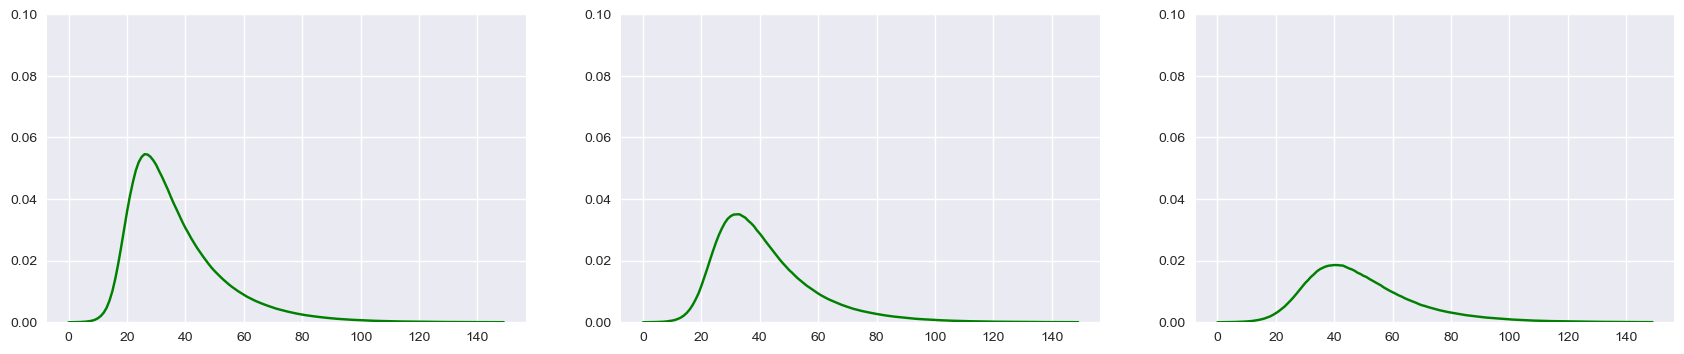

In [60]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(7*3, 4))

records_folder_path = os.path.join(os.path.abspath('../'), 'records')

for i, folder in enumerate(data):
    data_path = os.path.join(records_folder_path, 'section_1b', folder)
    states_df = pd.read_csv(os.path.join(data_path, 'states.csv'))
    
    axes[i].plot(states_df['Time'], states_df['Hospitalised'], color='green')
    
    print(np.std(states_df['Hospitalised'].values))
    
    axes[i].set_ylim(0, 0.1)

plt.show()

Now we can can the 'flatness' measure for each runthrough, we can plot this measure instead of the total number for each state

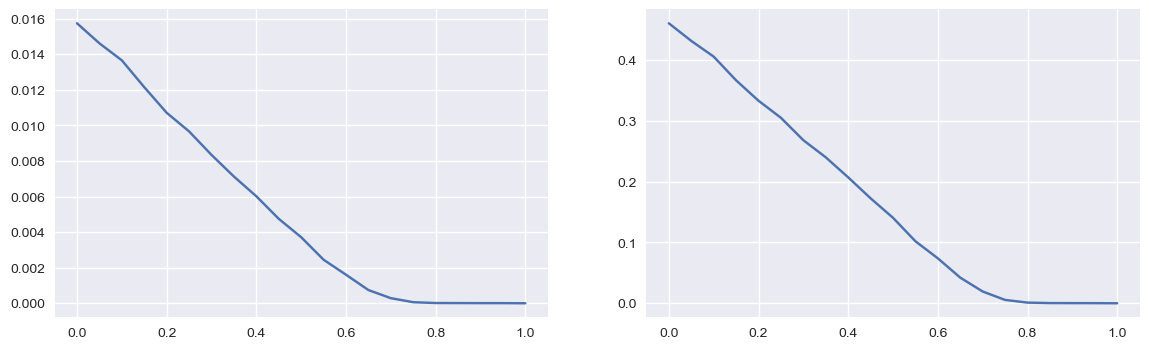

In [68]:
fit, axes = plt.subplots(nrows=1, ncols=2, figsize=(7*2, 4))

flatness_results = []
totals_results = []

run_folder_path = os.path.join(os.path.abspath('../'), 'records', 'section_1b')

for filename in os.listdir(run_folder_path):
    filename_path = os.path.join(run_folder_path, filename)
    match = re.match(r'RandomOneOff\(\d+\,\s(\d+\.\d+)\)', filename)
    
    if match is None:
        continue
    
    rho = float(match.groups()[0])
    
    states_df = pd.read_csv(os.path.join(filename_path, 'states.csv'))
    totals_df = pd.read_csv (os.path.join(filename_path, 'totals.csv'))
    
    flatness_results.append((rho, np.std(states_df['Hospitalised'].values)))
    totals_results.append((rho, totals_df.iloc[-1]['Hospitalised']))
    

flatness_results.sort()
totals_results.sort()

axes[0].plot([x for x, _ in flatness_results], [y for _, y in flatness_results])
axes[1].plot([x for x, _ in totals_results], [y for _, y in totals_results])

plt.show()